In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "MBA.csv"
df = pd.read_csv(file_path)

df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


(None,
    application_id  gender  international   gpa       major      race   gmat  \
 0               1  Female          False  3.30    Business     Asian  620.0   
 1               2    Male          False  3.28  Humanities     Black  680.0   
 2               3  Female           True  3.30    Business       NaN  710.0   
 3               4    Male          False  3.47        STEM     Black  690.0   
 4               5    Male          False  3.35        STEM  Hispanic  590.0   
 
    work_exp          work_industry admission  
 0       3.0     Financial Services     Admit  
 1       5.0  Investment Management       NaN  
 2       5.0             Technology     Admit  
 3       6.0             Technology       NaN  
 4       5.0             Consulting       NaN  )

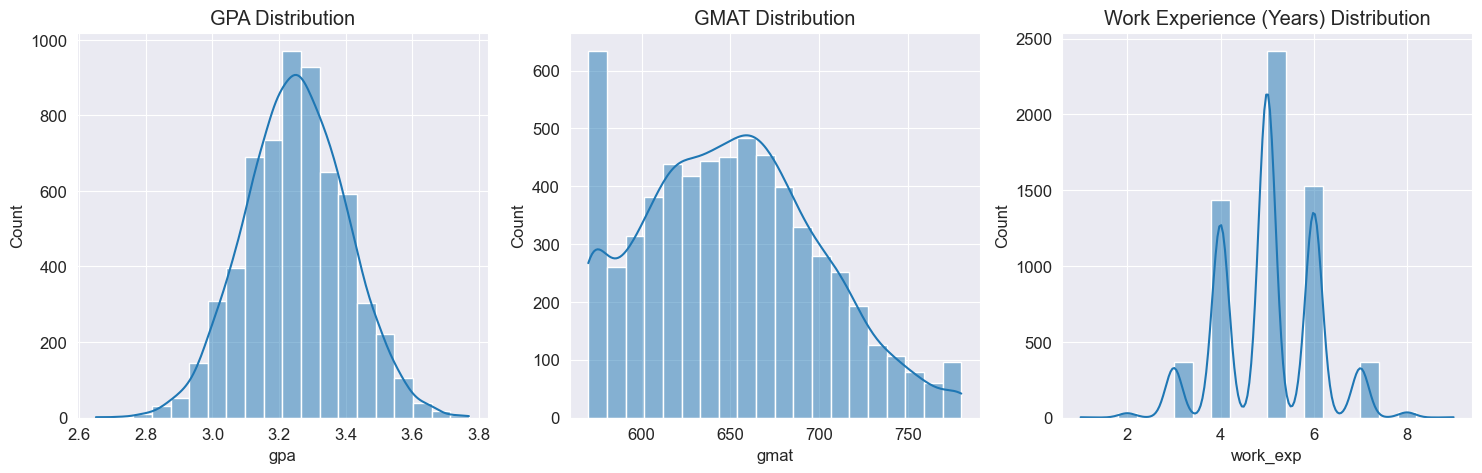

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['gpa'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("GPA Distribution")
sns.histplot(df['gmat'], bins=20, kde=True, ax=axes[1])
axes[1].set_title("GMAT Distribution")
sns.histplot(df['work_exp'], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Work Experience (Years) Distribution")
plt.show()

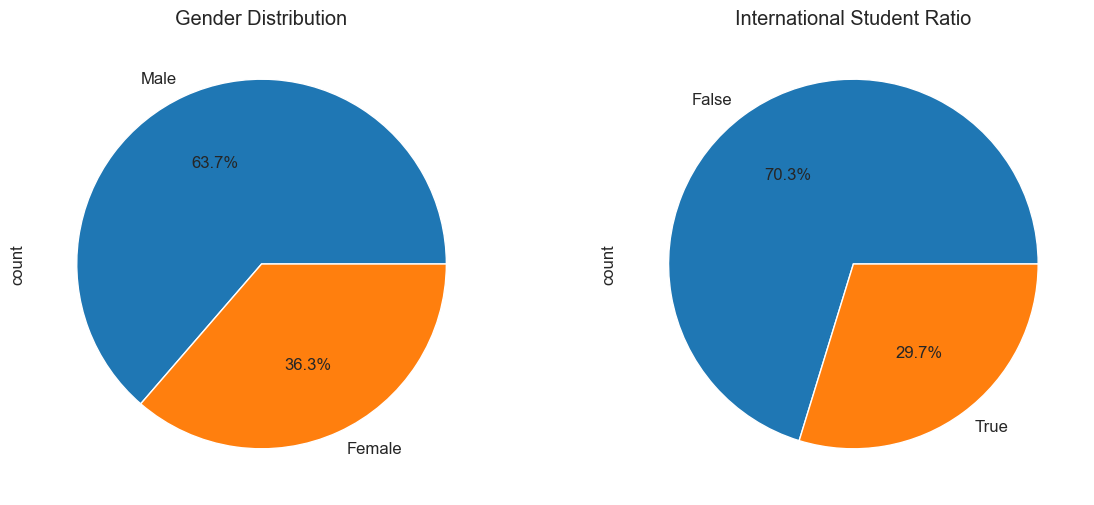

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title("Gender Distribution")
df['international'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[1].set_title("International Student Ratio")
plt.show()

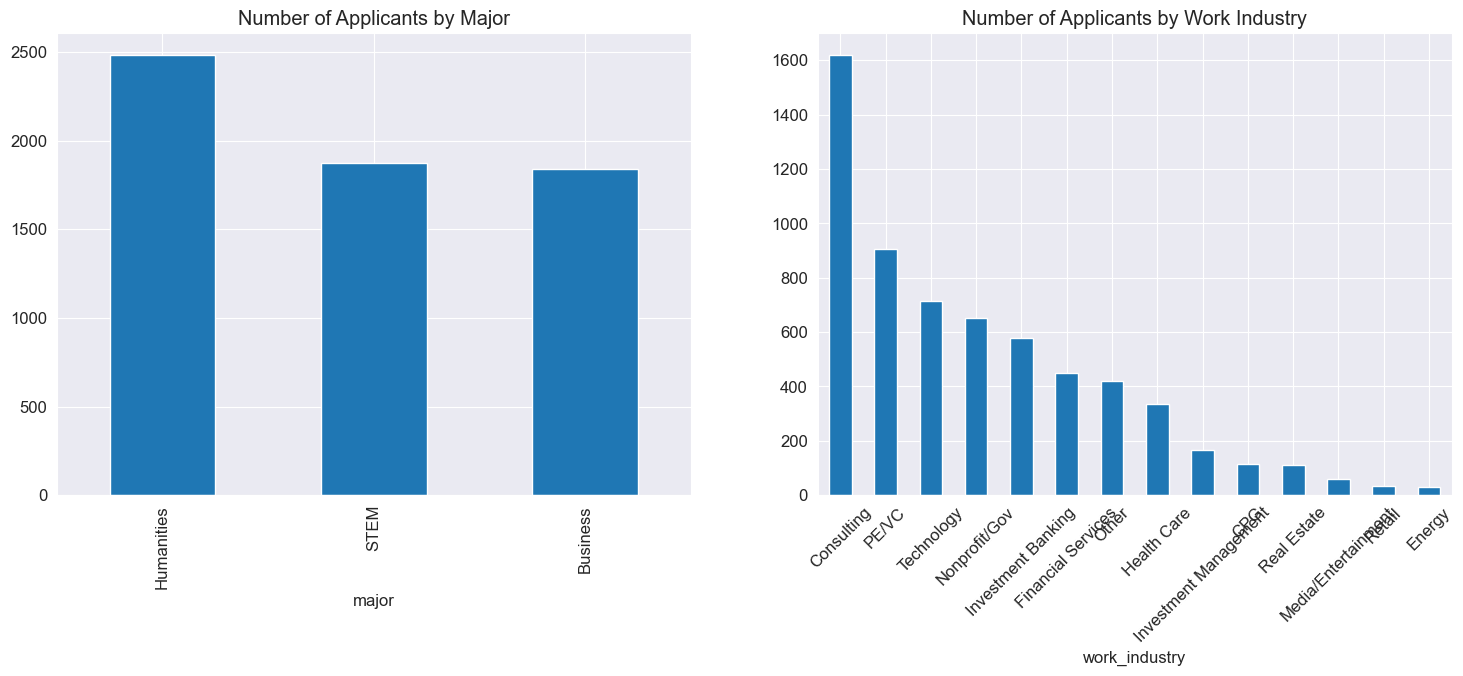

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
df['major'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("Number of Applicants by Major")
df['work_industry'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title("Number of Applicants by Work Industry")
plt.xticks(rotation=45)
plt.show()

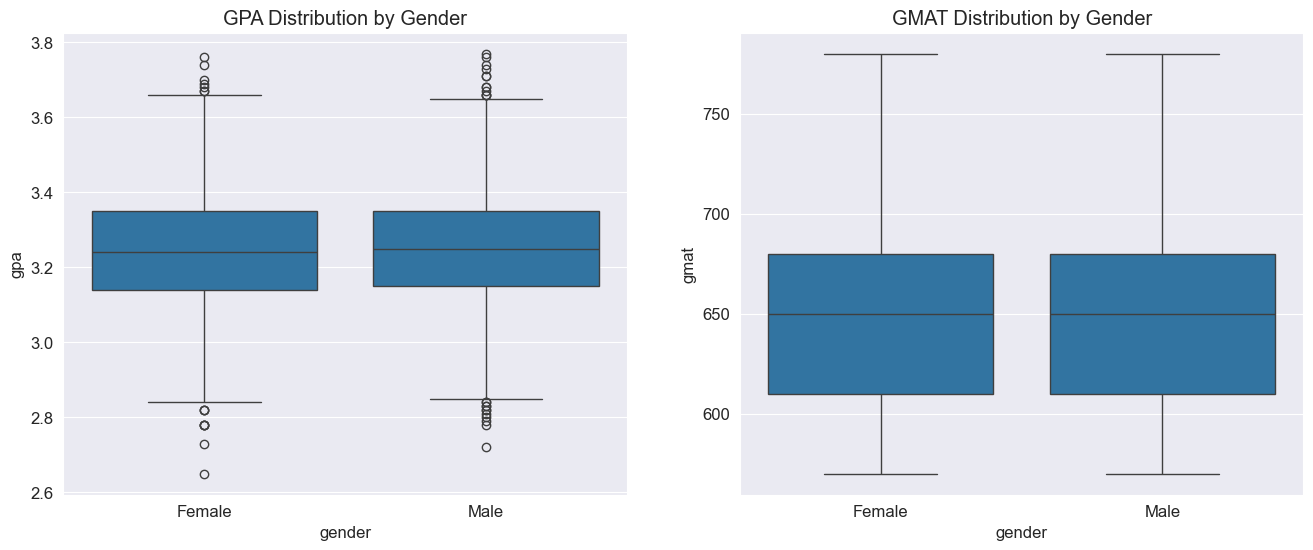

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x="gender", y="gpa", data=df, ax=axes[0])
axes[0].set_title("GPA Distribution by Gender")
sns.boxplot(x="gender", y="gmat", data=df, ax=axes[1])
axes[1].set_title("GMAT Distribution by Gender")
plt.show()

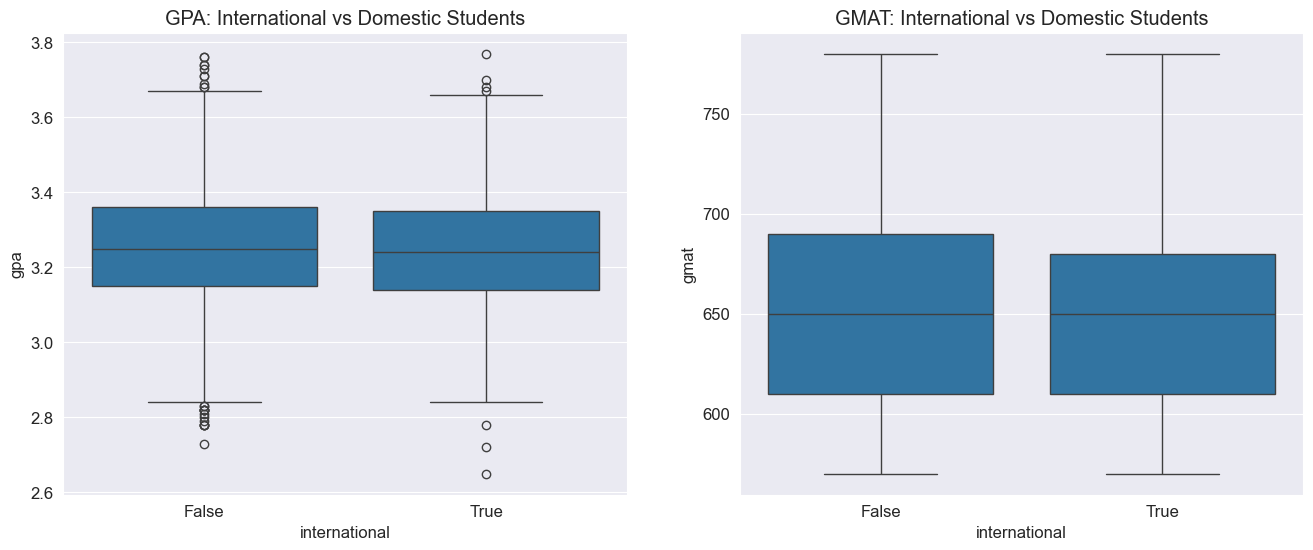

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x="international", y="gpa", data=df, ax=axes[0])
axes[0].set_title("GPA: International vs Domestic Students")
sns.boxplot(x="international", y="gmat", data=df, ax=axes[1])
axes[1].set_title("GMAT: International vs Domestic Students")
plt.show()

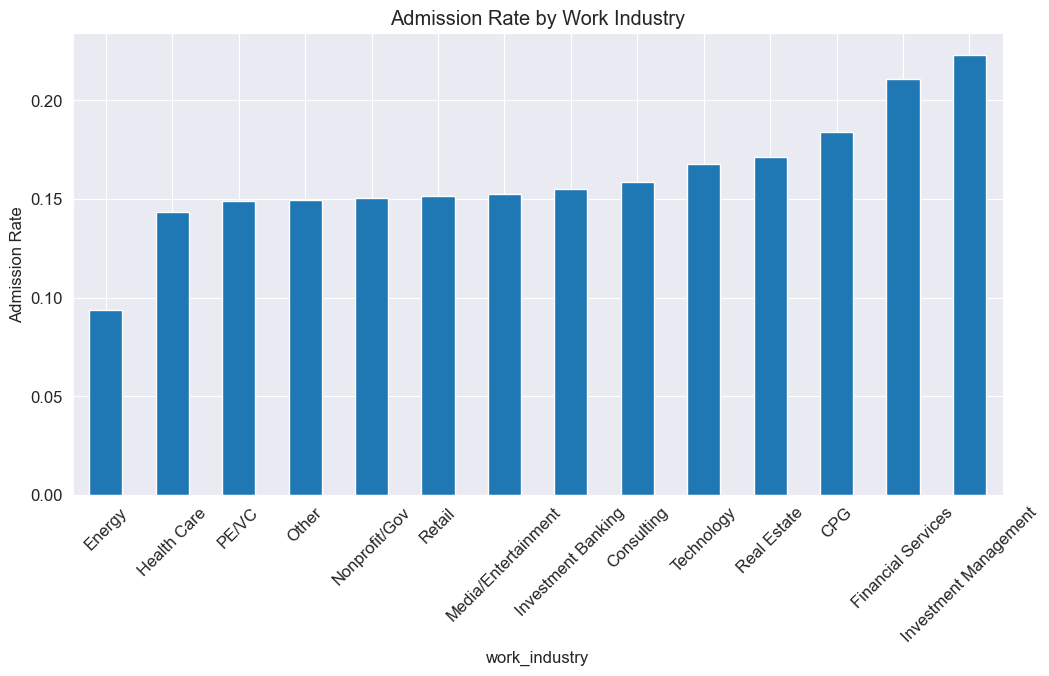

In [8]:
admission_rate = df.groupby("work_industry")["admission"].apply(lambda x: x.notnull().mean()).sort_values()
plt.figure(figsize=(12, 6))
admission_rate.plot(kind="bar")
plt.title("Admission Rate by Work Industry")
plt.ylabel("Admission Rate")
plt.xticks(rotation=45)
plt.show()

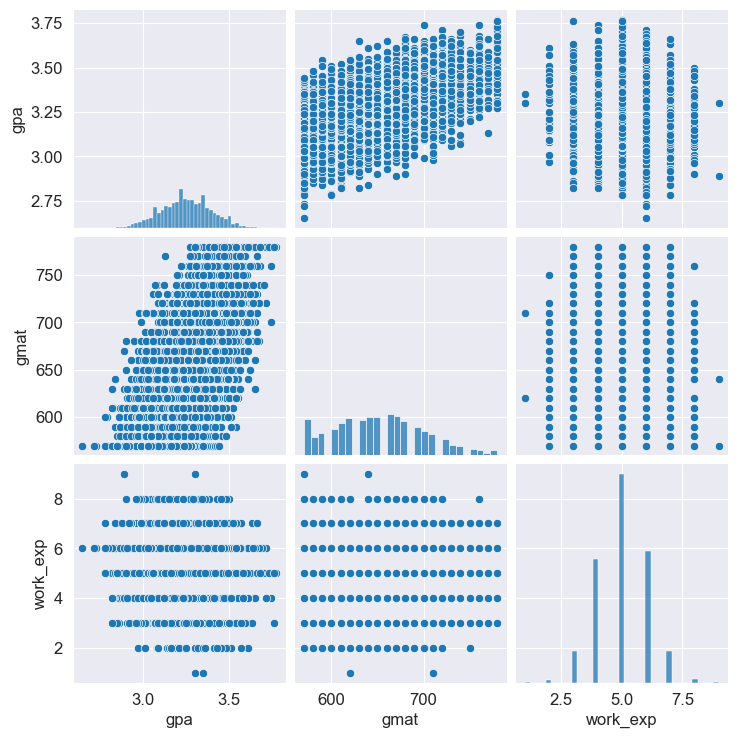

In [9]:
sns.pairplot(df[['gpa', 'gmat', 'work_exp']])
plt.show()

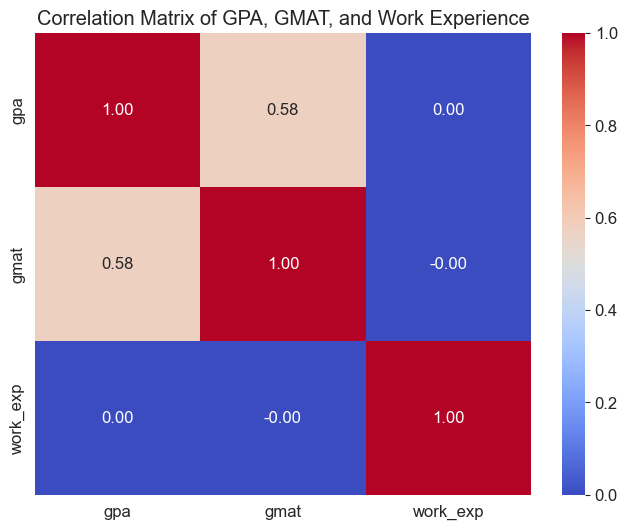

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['gpa', 'gmat', 'work_exp']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of GPA, GMAT, and Work Experience")
plt.show()

In [11]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [12]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

file_path = "MBA.csv"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

df = pd.read_csv(file_path)

print(df.info())  
print(df.head())

df['admission'] = df['admission'].apply(lambda x: 1 if x == "Admit" else 0)

categorical_cols = ['gender', 'international', 'major', 'race', 'work_industry']
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

label_encoders = {}
for col in existing_categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

X = df.drop(columns=['application_id', 'admission'], errors='ignore')
y = df['admission']

numerical_cols = ['gpa', 'gmat', 'work_exp']
existing_numerical_cols = [col for col in numerical_cols if col in X.columns]

if existing_numerical_cols:
    scaler = StandardScaler()
    X[existing_numerical_cols] = scaler.fit_transform(X[existing_numerical_cols].copy())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())
print(y_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB
None
   application_id  gender  international   gpa       major      race   gmat  \
0               1  Female          False  3.30    Business     Asian  620.0   
1               2    Male          False  3.28  Humanities     Black  680.0   
2               3  Female           Tr

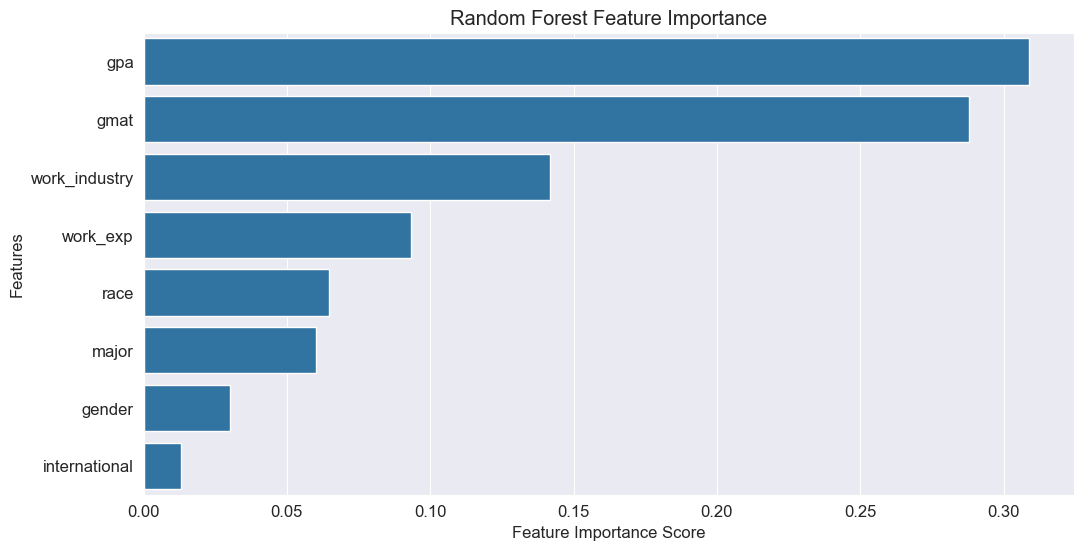

Random Forest Accuracy: 0.8354


In [13]:
if X_train.empty or X_test.empty:
    raise ValueError("Training or testing dataset is empty!")

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Feature Importance Plot
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=rf_importance.values, y=rf_importance.index)
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

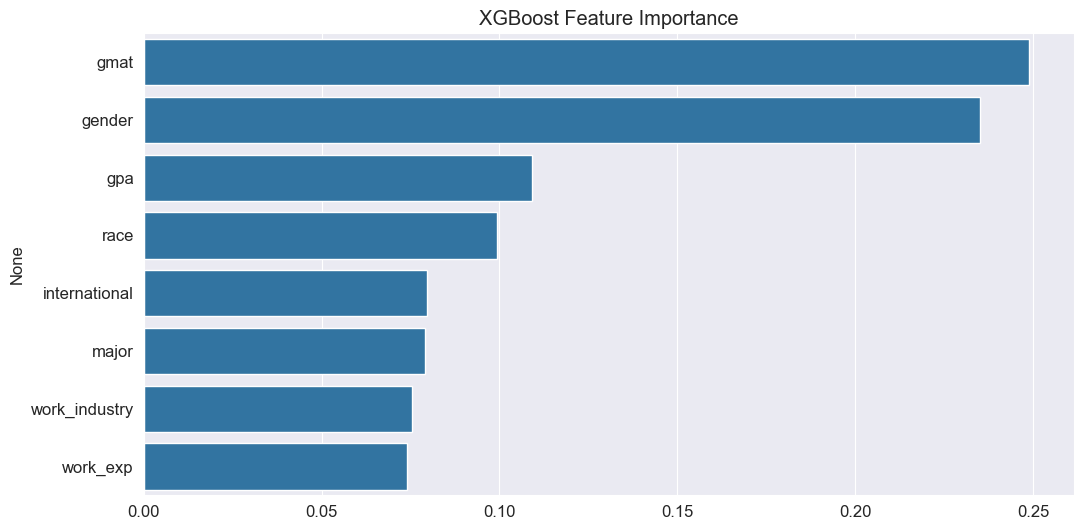

XGBoost Accuracy: 0.8370


In [14]:

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=xgb_importance.values, y=xgb_importance.index)
plt.title("XGBoost Feature Importance")
plt.show()

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")


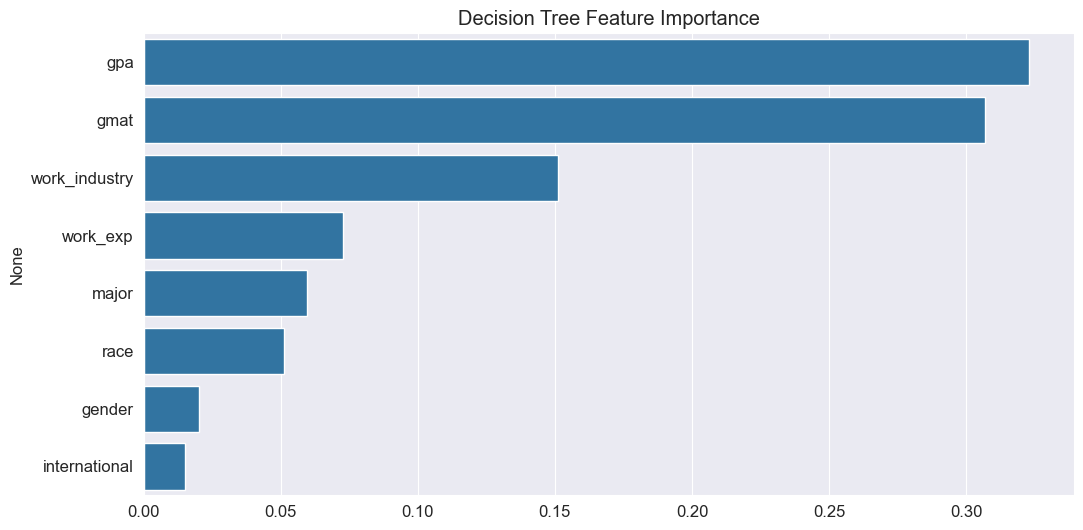

Decision Tree Accuracy: 0.8257


In [15]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

dt_importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=dt_importance.values, y=dt_importance.index)
plt.title("Decision Tree Feature Importance")
plt.show()
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

In [16]:
top_features = rf_importance.index[:5]
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [17]:
top_rf = RandomForestClassifier(n_estimators=100, random_state=42)
top_rf.fit(X_train_selected, y_train)
y_pred_top_rf = top_rf.predict(X_test_selected)
top_rf_accuracy = accuracy_score(y_test, y_pred_top_rf)

top_xgb = XGBClassifier(eval_metric='logloss')
top_xgb.fit(X_train_selected, y_train)
y_pred_top_xgb = top_xgb.predict(X_test_selected)
top_xgb_accuracy = accuracy_score(y_test, y_pred_top_xgb)

top_dt = DecisionTreeClassifier(random_state=42)
top_dt.fit(X_train_selected, y_train)
y_pred_top_dt = top_dt.predict(X_test_selected)
top_dt_accuracy = accuracy_score(y_test, y_pred_top_dt)

print(f"Random Forest (Top Features) Accuracy: {top_rf_accuracy:.4f}")
print(f"XGBoost (Top Features) Accuracy: {top_xgb_accuracy:.4f}")
print(f"Decision Tree (Top Features) Accuracy: {top_dt_accuracy:.4f}")

Random Forest (Top Features) Accuracy: 0.8305
XGBoost (Top Features) Accuracy: 0.8354
Decision Tree (Top Features) Accuracy: 0.7974


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier


In [19]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")

Logistic Regression Accuracy: 0.8426


In [20]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 0.8418


In [21]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Accuracy: {lgbm_accuracy:.4f}")

[LightGBM] [Info] Number of positive: 704, number of negative: 4251
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 149
[LightGBM] [Info] Number of data points in the train set: 4955, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142079 -> initscore=-1.798131
[LightGBM] [Info] Start training from score -1.798131
LightGBM Accuracy: 0.8313


In [22]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Neural Network Accuracy: {mlp_accuracy:.4f}")

MLP Neural Network Accuracy: 0.8103


In [23]:
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
        ('svm', svm),
        ('lgbm', lgbm)
    ],
    final_estimator=LogisticRegression()
)
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Ensemble Accuracy: {stacking_accuracy:.4f}")

[LightGBM] [Info] Number of positive: 704, number of negative: 4251
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 149
[LightGBM] [Info] Number of data points in the train set: 4955, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142079 -> initscore=-1.798131
[LightGBM] [Info] Start training from score -1.798131
[LightGBM] [Info] Number of positive: 564, number of negative: 3400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 3964, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142281 -> initscore=-1.796476
[LightGBM] [In

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, r2_score
)
import pandas as pd
import numpy as np

models = {
    'Linear_Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'XGB': XGBRegressor(),
    'SVM': SVR()  # SVM回归
}

is_classification = len(np.unique(y_train)) <= 10  

results = {'Model': []}

if is_classification:
    results.update({'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []})
else:
    results.update({'MSE': [], 'R2 Score': []})

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    results['Model'].append(name)

    if is_classification:
        pred_binary = (predictions > 0.5).astype(int)  
        results['Accuracy'].append(accuracy_score(y_test, pred_binary))
        results['Precision'].append(precision_score(y_test, pred_binary, average='weighted', zero_division=0))
        results['Recall'].append(recall_score(y_test, pred_binary, average='weighted', zero_division=0))
        results['F1-Score'].append(f1_score(y_test, pred_binary, average='weighted'))
    else:
        results['MSE'].append(mean_squared_error(y_test, predictions))
        results['R2 Score'].append(r2_score(y_test, predictions))

results_df = pd.DataFrame(results)
print(results_df)

               Model  Accuracy  Precision    Recall  F1-Score
0  Linear_Regression  0.845036   0.830522  0.845036  0.780037
1                KNN  0.837772   0.804998  0.837772  0.812680
2       DecisionTree  0.829701   0.823742  0.829701  0.826530
3       RandomForest  0.827280   0.796118  0.827280  0.806428
4                XGB  0.830508   0.799009  0.830508  0.808758
5                SVM  0.841808   0.708641  0.841808  0.769505


Regression line: y = 2.095 + 0.002x
Pearson Correlation: r = 0.578


C:\Users\cyndo\AppData\Local\Temp\ipykernel_12312\402437850.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept, slope = model.params[0], model.params[1]


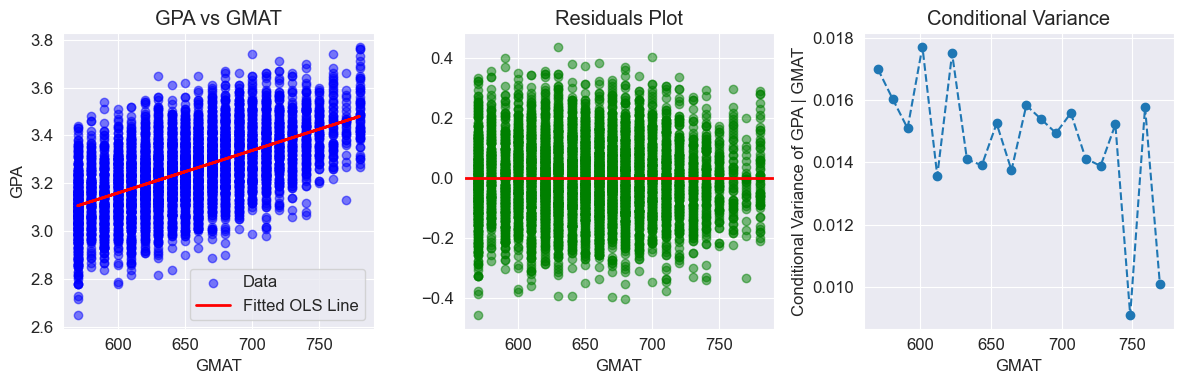

In [25]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
from scipy.stats import pearsonr

x = df['gmat']
y = df['gpa']

# Assume x and y are given
X = sm.add_constant(x)  # Add intercept for regression
model = sm.OLS(y, X).fit()  # Ordinary Least Squares Regression
y_pred = model.predict(X)  # Predicted values
residuals = y - y_pred

r, _ = pearsonr(x, y)
intercept, slope = model.params[0], model.params[1]
print(f"Regression line: y = {intercept:.3f} + {slope:.3f}x")
print(f"Pearson Correlation: r = {r:.3f}")

# Estimate conditional variance: Bin X and compute residual variance in each bin
bin_edges = np.linspace(min(x), max(x), 21)  # Define bins
bin_indices = np.digitize(x, bins=bin_edges)
conditional_var = [np.var(residuals[bin_indices == i]) for i in range(1, len(bin_edges))]

# Plot conditional variance
plt.figure(figsize=(12, 4))

# Subplot 1: Conditional Variance Plot
plt.subplot(1, 3, 3)
plt.plot(bin_edges[:-1], conditional_var, marker='o', linestyle='--')
plt.xlabel("GMAT")
plt.ylabel("Conditional Variance of GPA | GMAT")
plt.title("Conditional Variance")

# Subplot 2: 2D Scatter Plot and Fitted Line
plt.subplot(1, 3, 1)
plt.scatter(x, y, label="Data", color="blue", alpha=0.5)
plt.plot(x, y_pred, label="Fitted OLS Line", color="red", linewidth=2)
plt.xlabel("GMAT")
plt.ylabel("GPA")
plt.title("GPA vs GMAT")
plt.legend()

# Subplot 3: Residuals Plot
plt.subplot(1, 3, 2)
plt.scatter(x, residuals, label="Residuals", color="green", alpha=0.5)
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel("GMAT")
plt.title("Residuals Plot")

plt.tight_layout()
plt.show()


In [26]:
pd.crosstab([df['gender'], df['race'].fillna('Other')], df['admission'], margins=True)

admission       0    1   All
gender race                 
0      0      319   95   414
       1      300   40   340
       2      191   31   222
       3       68   23    91
       4      403  122   525
       5      520  139   659
1      0      638   95   733
       1      536   40   576
       2      343   31   374
       3      123   23   146
       4      809  122   931
       5     1044  139  1183
All          5294  900  6194

C:\Users\cyndo\AppData\Local\Temp\ipykernel_12312\2101695805.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='race', y='gpa', data=df, ax=axes[0], palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"])
C:\Users\cyndo\AppData\Local\Temp\ipykernel_12312\2101695805.py:5: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x='race', y='gpa', data=df, ax=axes[0], palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"])
C:\Users\cyndo\AppData\Local\Temp\ipykernel_12312\2101695805.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='race', y='gmat', data=df, ax=axes[1], 

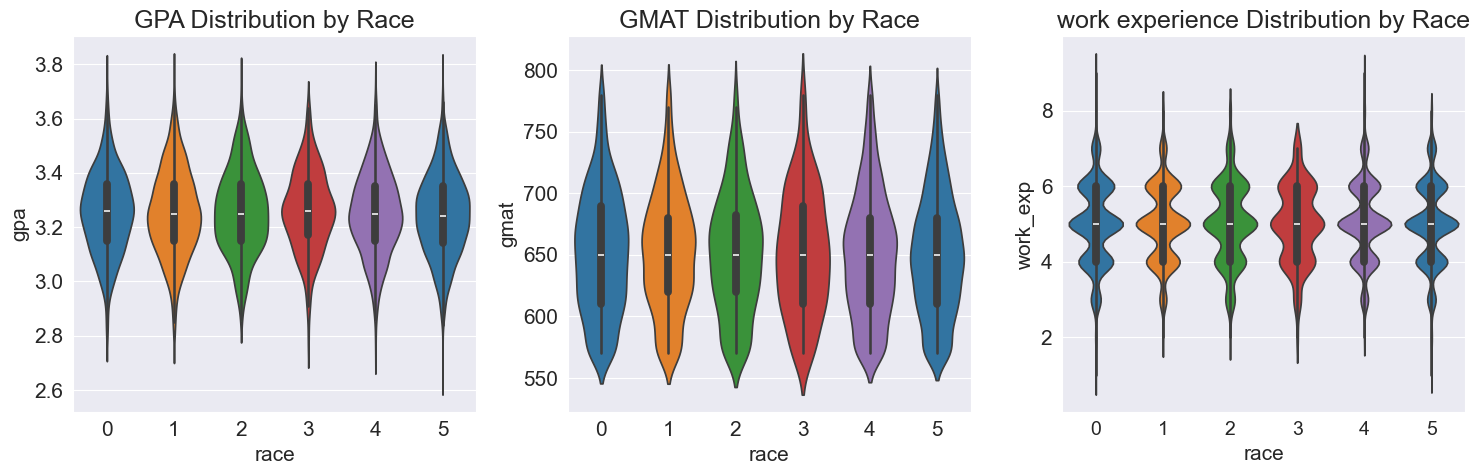

C:\Users\cyndo\AppData\Local\Temp\ipykernel_12312\2101695805.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='gpa', data=df, ax=axes[0], palette={"Male": "cyan", "Female": "red"})


ValueError: The palette dictionary is missing keys: {'1', '0'}

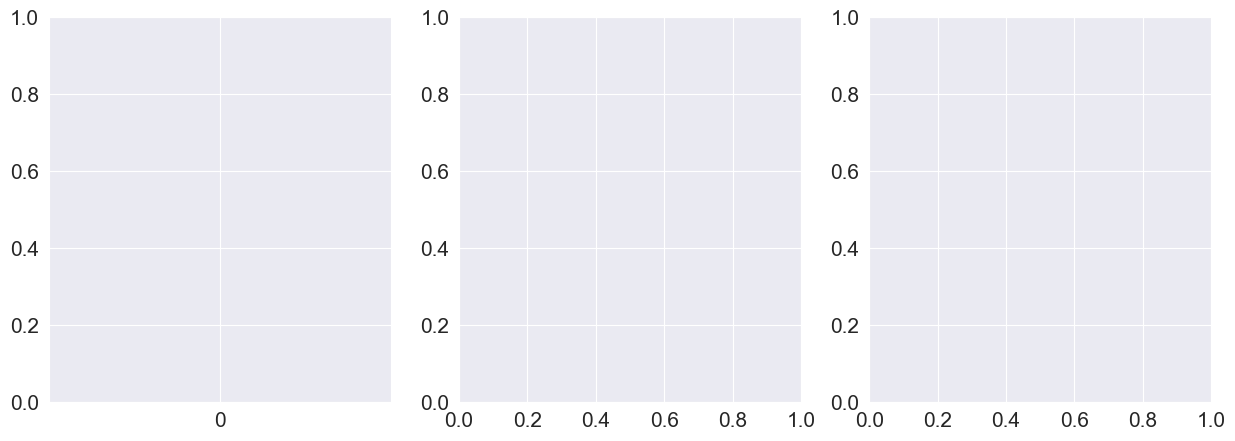

In [27]:
plt.rcParams.update({'font.size': 15})

# Set up the figure for two subplots (for GPA and GMAT)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.violinplot(x='race', y='gpa', data=df, ax=axes[0], palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"])
axes[0].set_title('GPA Distribution by Race')
sns.violinplot(x='race', y='gmat', data=df, ax=axes[1], palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"])
axes[1].set_title('GMAT Distribution by Race')
sns.violinplot(x='race', y='work_exp', data=df, ax=axes[2], palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"])
axes[2].set_title('work experience Distribution by Race')
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.violinplot(x='gender', y='gpa', data=df, ax=axes[0], palette={"Male": "cyan", "Female": "red"})
axes[0].set_title('GPA Distribution by Gender')
sns.violinplot(x='gender', y='gmat', data=df, ax=axes[1], palette={"Male": "cyan", "Female": "red"})
axes[1].set_title('GMAT Distribution by Gender')
sns.violinplot(x='gender', y='work_exp', data=df, ax=axes[2], palette={"Male": "cyan", "Female": "red"})
axes[2].set_title('work experience Distribution by Gender')
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

# fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# sns.boxplot(x='gender', y='gpa', data=df, ax=axes[0])
# axes[0].set_title('GPA Distribution by Gender')
# sns.boxplot(x='gender', y='gmat', data=df, ax=axes[1])
# axes[1].set_title('GMAT Distribution by Gender')
# sns.boxplot(x='gender', y='work_exp', data=df, ax=axes[2])
# axes[2].set_title('work experience Distribution by Gender')
# plt.xticks(fontsize=14)
# plt.tight_layout()
# plt.show()

C:\Users\cyndo\AppData\Local\Temp\ipykernel_12312\1153061407.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  percentage = (height / race_total) * 100  # Calculate the percentage


ZeroDivisionError: division by zero

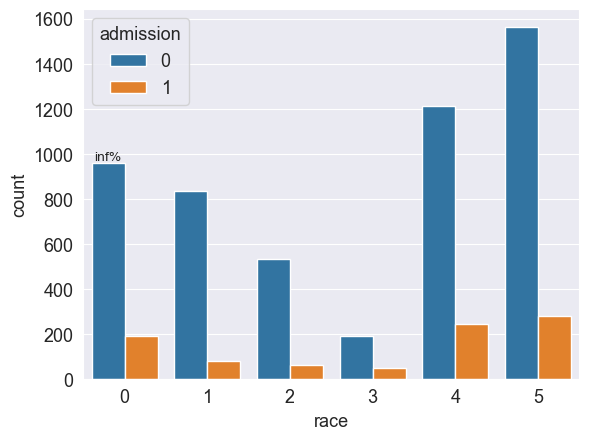

In [28]:
plt.rcParams.update({'font.size': 13})
ax = sns.countplot(x='race', hue='admission', data=df)

# Add percentage labels to the bars
races = ax.get_xticklabels()
sorted_patches = sorted(ax.patches[:15], key=lambda patch: patch.get_x())
for idx,p in enumerate(sorted_patches):
    height = p.get_height()
    race = races[idx//3].get_text()
    race_total = df[df['race'] == race].shape[0]
    percentage = (height / race_total) * 100  # Calculate the percentage
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=10)  # Add the text label
plt.show()

C:\Users\cyndo\AppData\Local\Temp\ipykernel_12312\4160360480.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  percentage = (height / gender_total) * 100  # Calculate the percentage


ZeroDivisionError: division by zero

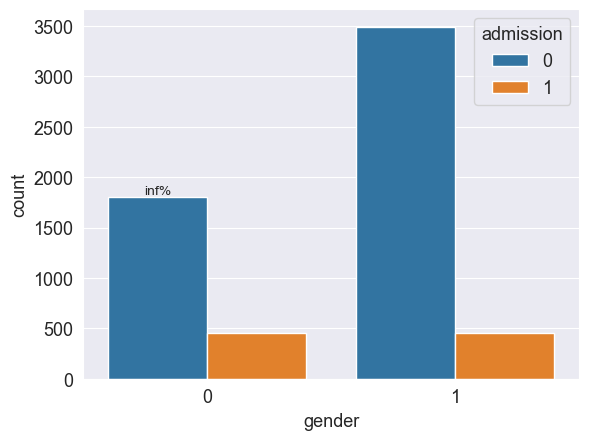

In [29]:
plt.rcParams.update({'font.size': 13})
ax = sns.countplot(x='gender', hue='admission', data=df)

# Add percentage labels to the bars
genders = ax.get_xticklabels()
sorted_patches = sorted(ax.patches[:6], key=lambda patch: patch.get_x())
for idx,p in enumerate(sorted_patches):
    height = p.get_height()
    gender = genders[idx//3].get_text()
    gender_total = df[df['gender'] == gender].shape[0]
    percentage = (height / gender_total) * 100  # Calculate the percentage
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=10)  # Add the text label
plt.show()